In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
data = pd.read_csv(r'E:\Projects\stock price prediction using time series data\intel.csv')
print(data.columns)


Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [4]:

data = data[['Date', 'Open', 'Close']]

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', drop=True, inplace=True)

data.head()


,Open,Close
Date,,
1980-03-17 00:00:00+00:00,0.325521,0.325521
1980-03-18 00:00:00+00:00,0.325521,0.322917
1980-03-19 00:00:00+00:00,0.330729,0.330729
1980-03-20 00:00:00+00:00,0.330729,0.329427
1980-03-21 00:00:00+00:00,0.322917,0.317708


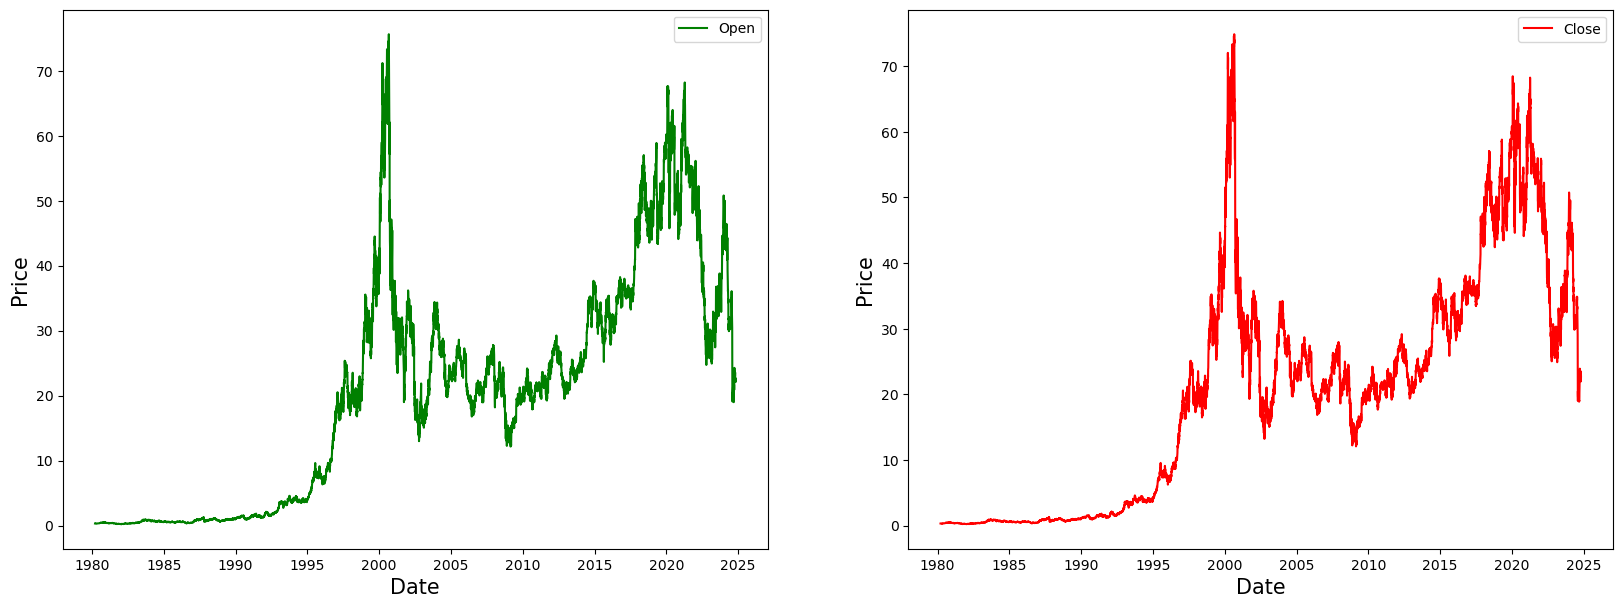

In [5]:

fig, ax = plt.subplots(1, 2, figsize=(20, 7))

ax[0].plot(data['Open'], label='Open', color='green')
ax[0].set_xlabel('Date', size=15)
ax[0].set_ylabel('Price', size=15)
ax[0].legend()

ax[1].plot(data['Close'], label='Close', color='red')
ax[1].set_xlabel('Date', size=15)
ax[1].set_ylabel('Price', size=15)
ax[1].legend()

plt.show()


In [6]:
Ms = MinMaxScaler()
data [data .columns] = Ms.fit_transform(data )

training_size = round(len(data ) * 0.80)

train_data = data [:training_size]
test_data  = data [training_size:]

In [7]:

def create_sequence(dataset, sequence_length=50):
    sequences = []
    labels = []
    
    start_idx = 0
    
    for stop_idx in range(sequence_length, len(dataset)):
        sequences.append(dataset.iloc[start_idx:stop_idx].values) 
        labels.append(dataset.iloc[stop_idx].values)  
        start_idx += 1
    
    return np.array(sequences), np.array(labels)

train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)


In [8]:

# Define model parameters for experimentation
units = 50  # Try values like 25, 100, etc.
dropout_rate = 0.1  # Try values like 0.1, 0.3, etc.

# Initialize the Sequential model
model = Sequential()

# Add LSTM layers and Dropout
model.add(LSTM(units=units, return_sequences=True, input_shape=(train_seq.shape[1], train_seq.shape[2])))
model.add(Dropout(dropout_rate))

model.add(LSTM(units=units))
model.add(Dropout(dropout_rate))

# Output layer with 2 units (adjust if needed)
model.add(Dense(2))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Add EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with EarlyStopping
history = model.fit(
    train_seq, train_label,
    epochs=50,  # Start with 50 epochs; EarlyStopping may halt early
    batch_size=64,
    validation_split=0.2,  # Use 20% of training data as validation data
    callbacks=[early_stopping]
)

# Save the trained model
model.save('lstm_stock_model.h5')  # Saves the model in HDF5 format

# Display model architecture summary
model.summary()

Epoch 1/50
112/112 [==============================] - 18s 103ms/step - loss: 0.0041 - mean_absolute_error: 0.0306 - val_loss: 3.0290e-04 - val_mean_absolute_error: 0.0146
Epoch 2/50
112/112 [==============================] - 9s 76ms/step - loss: 7.5091e-04 - mean_absolute_error: 0.0150 - val_loss: 1.3437e-04 - val_mean_absolute_error: 0.0090
Epoch 3/50
112/112 [==============================] - 9s 78ms/step - loss: 6.6192e-04 - mean_absolute_error: 0.0139 - val_loss: 2.2877e-04 - val_mean_absolute_error: 0.0125
Epoch 4/50
112/112 [==============================] - 9s 76ms/step - loss: 5.5949e-04 - mean_absolute_error: 0.0130 - val_loss: 1.1484e-04 - val_mean_absolute_error: 0.0083
Epoch 5/50
112/112 [==============================] - 10s 87ms/step - loss: 6.2035e-04 - mean_absolute_error: 0.0137 - val_loss: 2.0899e-04 - val_mean_absolute_error: 0.0115
Epoch 6/50
112/112 [==============================] - 9s 84ms/step - loss: 4.9153e-04 - mean_absolute_error: 0.0122 - val_loss: 1.3966e-

In [9]:
model.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label), verbose=1)
test_predicted = model.predict(test_seq)
test_inverse_predicted = Ms.inverse_transform(test_predicted)

Epoch 1/80
280/280 [==============================] - 26s 93ms/step - loss: 2.0676e-04 - mean_absolute_error: 0.0099 - val_loss: 1.6704e-04 - val_mean_absolute_error: 0.0084
Epoch 2/80
280/280 [==============================] - 26s 93ms/step - loss: 2.0655e-04 - mean_absolute_error: 0.0098 - val_loss: 3.5244e-04 - val_mean_absolute_error: 0.0150
Epoch 3/80
280/280 [==============================] - 27s 96ms/step - loss: 1.8930e-04 - mean_absolute_error: 0.0095 - val_loss: 1.7749e-04 - val_mean_absolute_error: 0.0088
Epoch 4/80
280/280 [==============================] - 29s 105ms/step - loss: 1.9817e-04 - mean_absolute_error: 0.0097 - val_loss: 1.6952e-04 - val_mean_absolute_error: 0.0087
Epoch 5/80
280/280 [==============================] - 24s 85ms/step - loss: 1.8638e-04 - mean_absolute_error: 0.0094 - val_loss: 1.8616e-04 - val_mean_absolute_error: 0.0094
Epoch 6/80
280/280 [==============================] - 24s 86ms/step - loss: 1.8121e-04 - mean_absolute_error: 0.0093 - val_loss: 

In [10]:
# Merging actual and predicted data for better visualization
gs_slic_data = pd.concat([data .iloc[-2200:].copy(),pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],index=data .iloc[-2200:].index)], axis=1)

gs_slic_data[['Open','Close']] = Ms.inverse_transform(gs_slic_data[['Open','Close']])

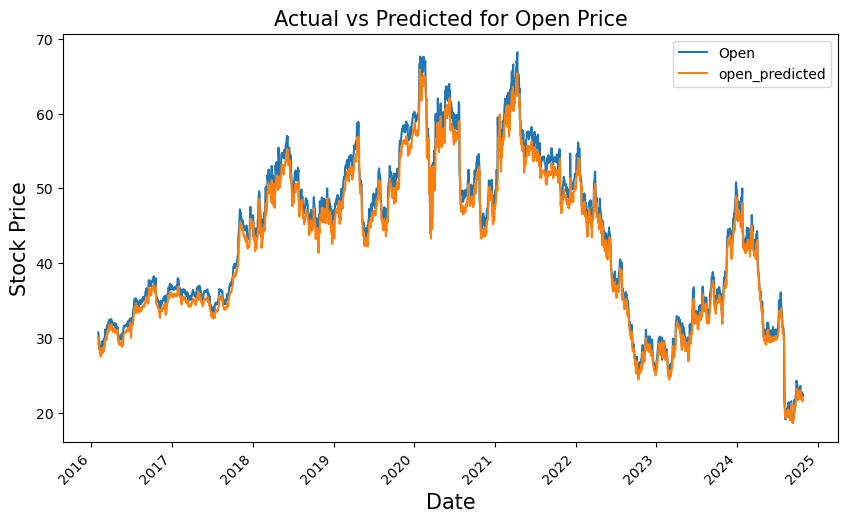

In [11]:
gs_slic_data[['Open', 'open_predicted']].plot(figsize=(10, 6))

plt.xticks(rotation=45)
plt.xlabel('Date', size=15)
plt.ylabel('Stock Price', size=15)
plt.title('Actual vs Predicted for Open Price', size=15)
plt.show()

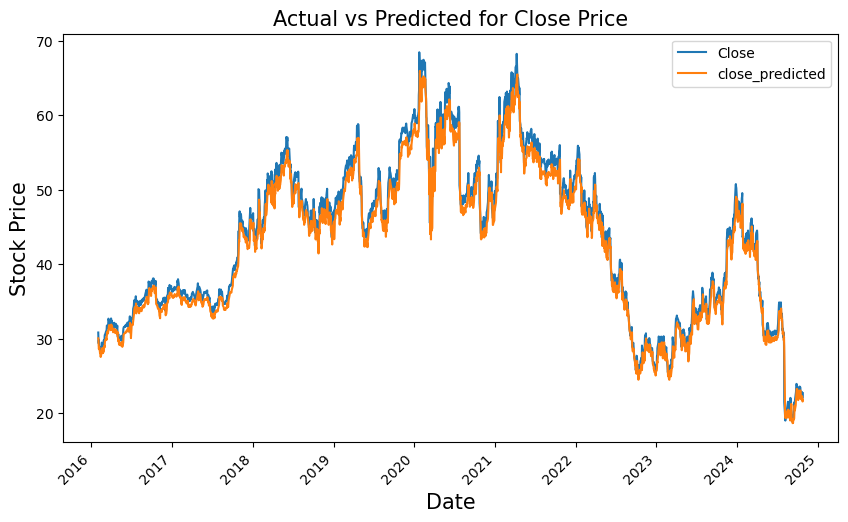

In [12]:
gs_slic_data[['Close', 'close_predicted']].plot(figsize=(10, 6))
plt.xticks(rotation=45)
plt.xlabel('Date', size=15)
plt.ylabel('Stock Price', size=15)
plt.title('Actual vs Predicted for Close Price', size=15)
plt.show()